<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    DL - Spambase
  </h1>
</div>

<h2 style="color:#009900; font-family: Arial, sans-serif; font-size: 28px; margin-top: 50px; font-weight: normal;  border-bottom: 2px solid #009900;">
Bibliothèques
</h2>

In [58]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo 

<h2 style="color:#009900; font-family: Arial, sans-serif; font-size: 28px; margin-top: 50px; font-weight: normal;  border-bottom: 2px solid #009900;">
Ouverture et Etude des Données
</h2>

In [59]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [60]:
display(X)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [61]:
print(X.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [62]:
print(X.isna().sum().sum())

0


In [63]:
print(X.isnull().sum().sum())

0


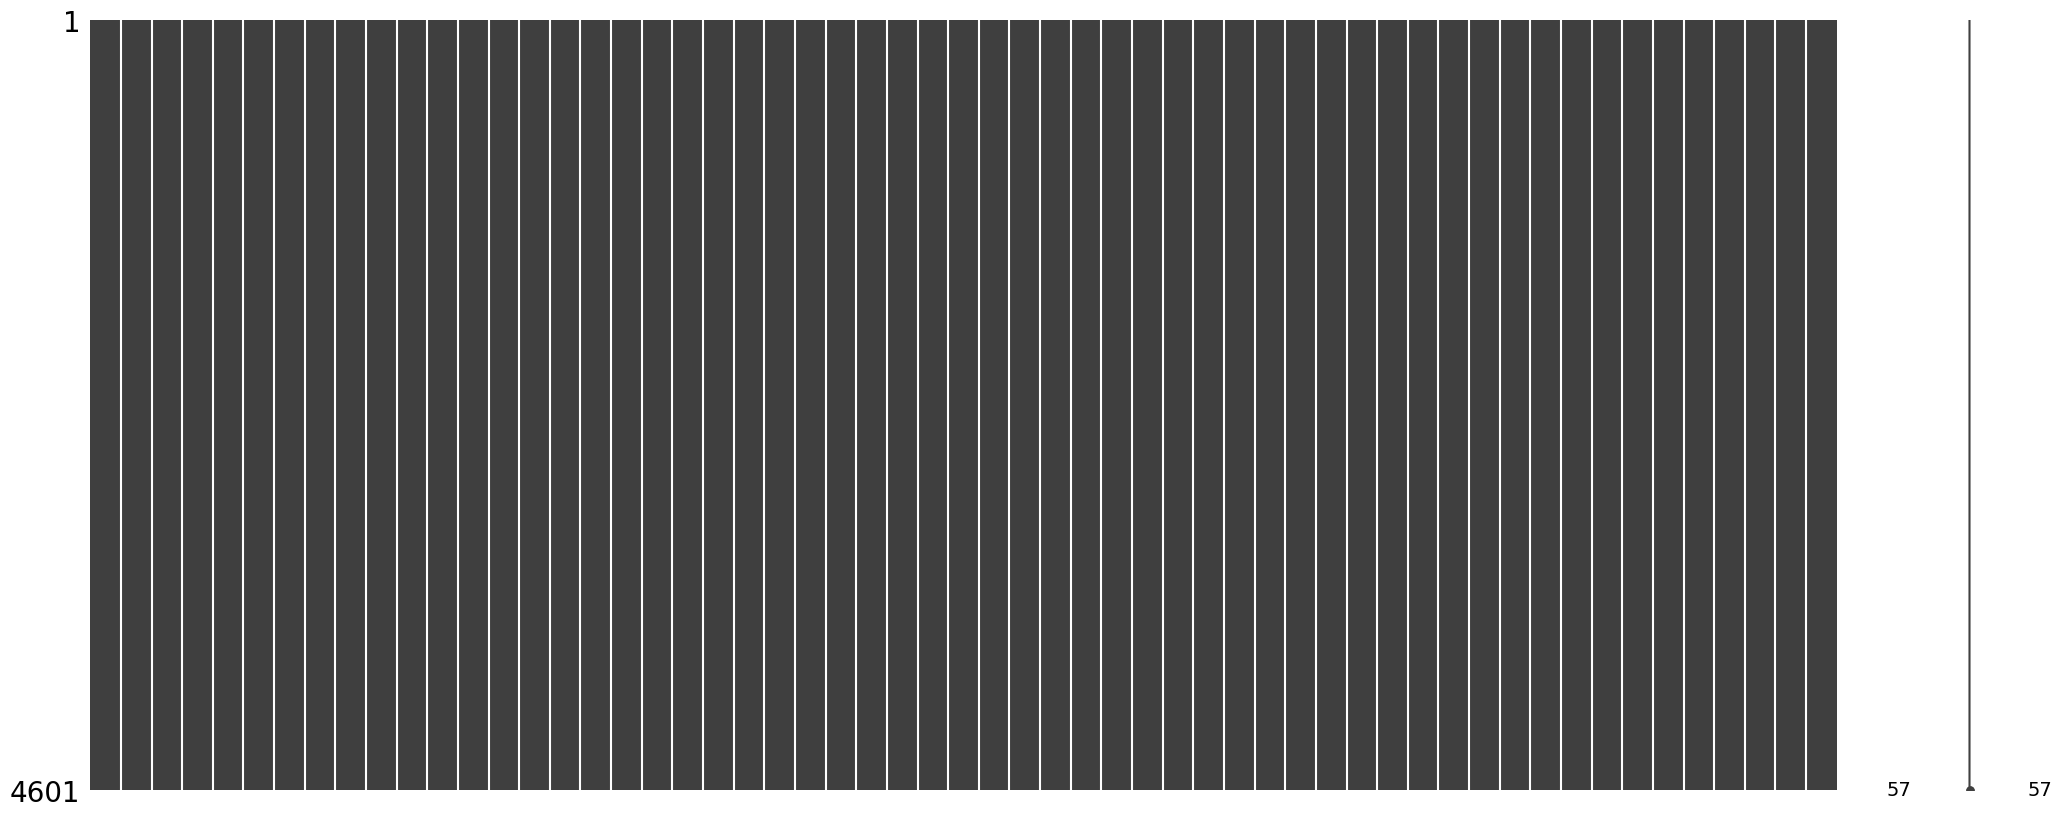

In [64]:
msno.matrix(X)
plt.show()

This graphic highlights to us the fact that there no missing values.

We gather informations about our dataset, we already know that there is :
 - 57 Variables 
 - 4601 inviduals
 - binary target
 - Apparently no missing values 

We can now start working on our dataset, but we still need to be careful in case missing values are replaced with null values.

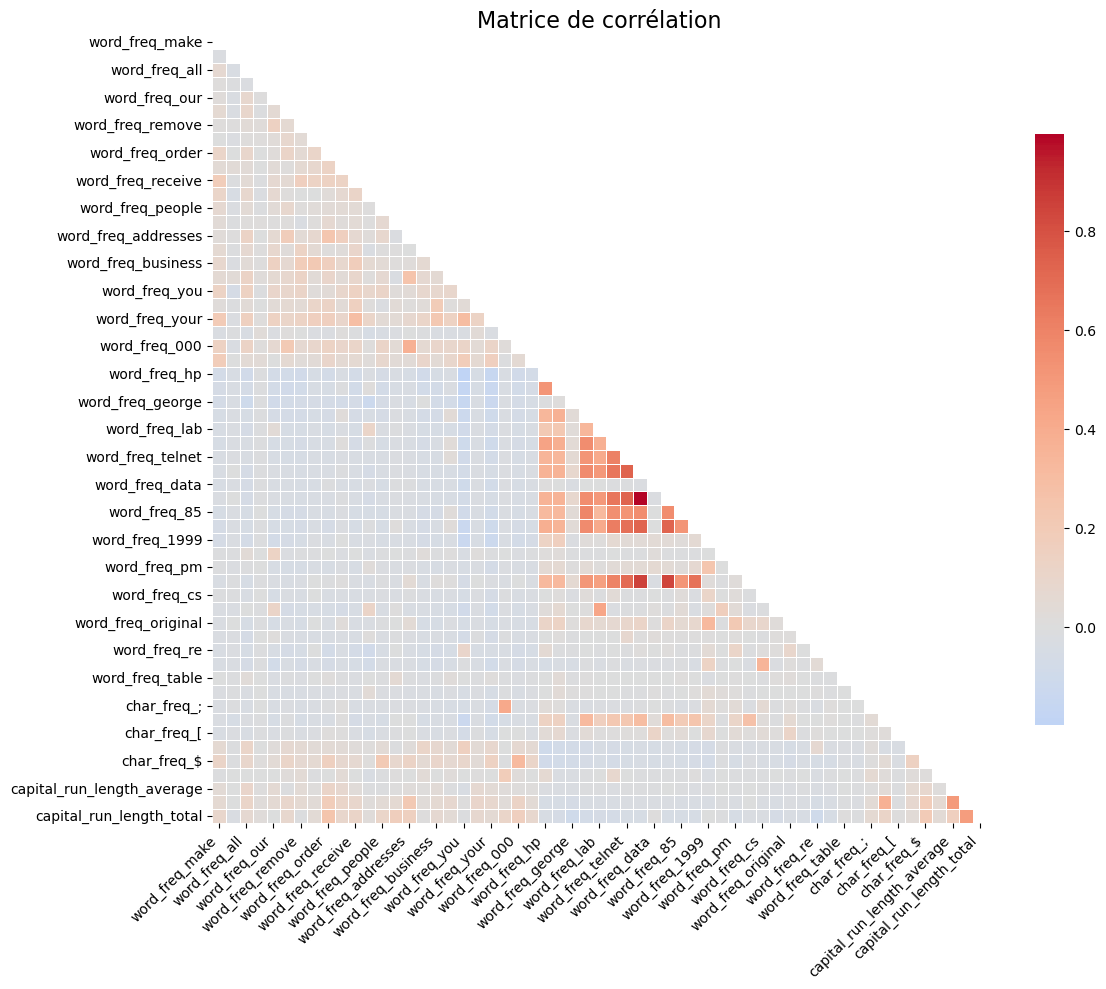

In [65]:
y_df = pd.DataFrame(y).reset_index(drop=True)
y_df.columns = ['Target']
X_df = pd.DataFrame(X).reset_index(drop=True) 

combined_df = pd.concat([X_df, y_df], axis=1)

correlation_matrix = X.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matrice de corrélation', size=16)
plt.tight_layout()  
plt.show()

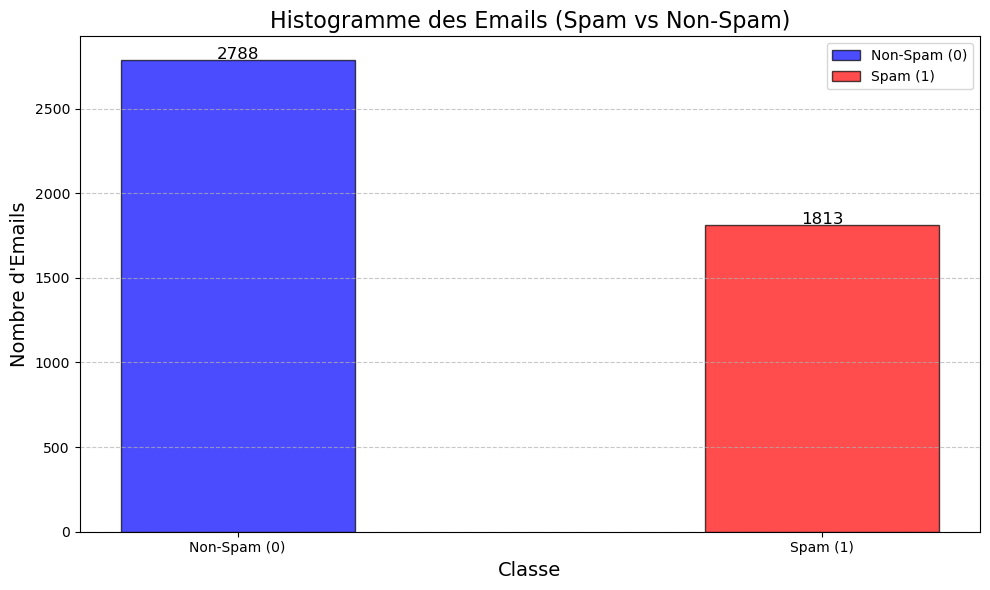

In [66]:
y_values = np.array(y).flatten()
y_values = y_values[y_values != np.nan] 

counts = pd.Series(y_values).value_counts().sort_index()

plt.figure(figsize=(10, 6))

bar_width = 0.4
x_labels = counts.index 
plt.bar(x_labels[0], counts[0], width=bar_width, color='blue', alpha=0.7, edgecolor='black', label='Non-Spam (0)')
plt.bar(x_labels[1], counts[1], width=bar_width, color='red', alpha=0.7, edgecolor='black', label='Spam (1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.title('Histogramme des Emails (Spam vs Non-Spam)', fontsize=16)
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Nombre d\'Emails', fontsize=14)
plt.xticks(ticks=x_labels, labels=['Non-Spam (0)', 'Spam (1)']) 

for i in range(len(counts)):
    plt.text(x_labels[i], counts[i] + 5, str(counts[i]), ha='center', fontsize=12, color='black')

plt.legend()
plt.tight_layout() 
plt.show()

We can se that we have more non-spam emails than spam one, our goal is to be able to detect a spam email.

Here we scale our data because all variables are continuous, and even if the values don’t seem to go very high according to the description, we can still normalize them so they have similar ranges. This ensures that each variable contributes equally to the analysis and prevents features with larger ranges from disproportionately influencing the results. 

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We separate our data into 2 datasets of training and test. We use the parameter stratify so we keep the same proportions of spam and non-spam into our two datasets.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

# Logistic Regression

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9290
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



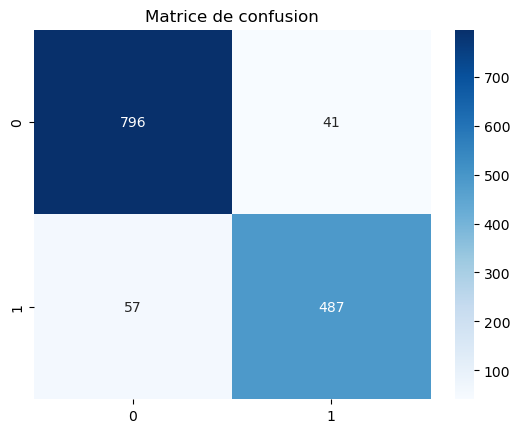

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Others models

In [70]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialiser plusieurs modèles
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.9290
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.93      0.89      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381

KNN Accuracy: 0.8993
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       837
           1       0.88      0.86      0.87       544

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/var/folders/zw/lt6wh5k91_gg7d4sfkvd9m180000gn/T/ipykernel_7513/1952687870.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Accuracy: 0.9537
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.92      0.94       544

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381

Logistic Regression Accuracy: 0.9290
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Comparer les performances des différents modèles à l’aide de métriques telles que la précision, le rappel, et le score F1.
- Le modèle qui aura le meilleur compromis en termes de précision, rappel, et score F1 sera considéré comme le plus performant.


Recherche des hyperparamètres optimaux avec GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

# Exemple avec RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(grid_search.best_params_)

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


# MLP

In [73]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[796  41]
 [ 38 506]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       837
           1       0.93      0.93      0.93       544

    accuracy                           0.94      1381
   macro avg       0.94      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381

